## Stock  Price Prediction

## Import Necessary Files

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

## Loading of Data

In [51]:

trn_d=pd.read_csv("stocknet_trn_data.csv")
trn_trg=pd.read_csv("stocknet_trn_data_targets.csv",header=None)
tst_d=pd.read_csv("stocknet_tst_data.csv")

## Data Preprocessing

In [52]:

trn_trg.columns=["Day","Close"]


In [53]:
trn_d

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [54]:
tst_d

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


## Null Values

In [55]:
print("Train_data",'\n',trn_d.isnull().sum())
print('\n')
print("Train_data_label",'\n',trn_trg.isnull().sum())
print('\n')
print("Test_data",'\n',tst_d.isnull().sum())

Train_data 
 Open      3
High      3
Low       3
Volume    3
dtype: int64


Train_data_label 
 Day      0
Close    3
dtype: int64


Test_data 
 Open      0
High      0
Low       0
Volume    0
dtype: int64


In [56]:
## Merging of target variable with data
trn_d=pd.concat([trn_d,trn_trg],axis=1)

In [57]:
trn_d

,Open,High,Low,Volume,Day,Close
0,75.430000,75.910004,75.139999,3436700.0,d1,75.650002
1,124.930000,124.940002,124.169998,2366700.0,d2,124.449997
2,84.339996,84.370003,82.370003,11338700.0,d3,82.660004
3,56.770000,57.150002,56.529999,413300.0,d4,57.009998
4,47.419998,48.090000,46.759998,9531100.0,d5,47.860001
...,...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,d97728,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,d97729,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,d97730,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,d97731,115.400002


## Data Analysis

In [58]:
## Corellation of all features
print(trn_d.corr())

            Open      High       Low    Volume     Close
Open    1.000000  0.999988  0.999988 -0.054682  0.999974
High    0.999988  1.000000  0.999987 -0.054687  0.999989
Low     0.999988  0.999987  1.000000 -0.054680  0.999988
Volume -0.054682 -0.054687 -0.054680  1.000000 -0.054684
Close   0.999974  0.999989  0.999988 -0.054684  1.000000


<AxesSubplot:>

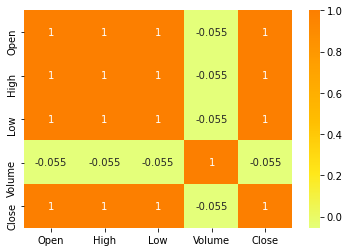

In [59]:
## Correlation plot

a=trn_d.corr()
sns.heatmap(a,cmap='Wistia', annot=True)

In [60]:
# Droping Day column
trn_d.drop("Day",axis='columns',inplace=True)

In [61]:
trn_d

,Open,High,Low,Volume,Close
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


In [62]:
trn_d.describe()

,Open,High,Low,Volume,Close
count,97729.000000,97729.000000,97729.000000,9.772900e+04,97729.000000
mean,2427.661341,2439.557429,2413.965223,9.064781e+06,2427.381769
std,21797.841949,21900.340643,21678.006665,1.800910e+07,21794.748626
min,2.130000,2.280000,1.960000,0.000000e+00,2.020000
25%,40.450001,40.730000,40.180000,1.198000e+06,40.459999
50%,65.959999,66.489998,65.459999,3.544600e+06,66.010002
75%,97.669998,98.470001,96.930000,8.996400e+06,97.669998
max,272800.000000,272885.000000,271040.000000,6.166205e+08,271062.000000


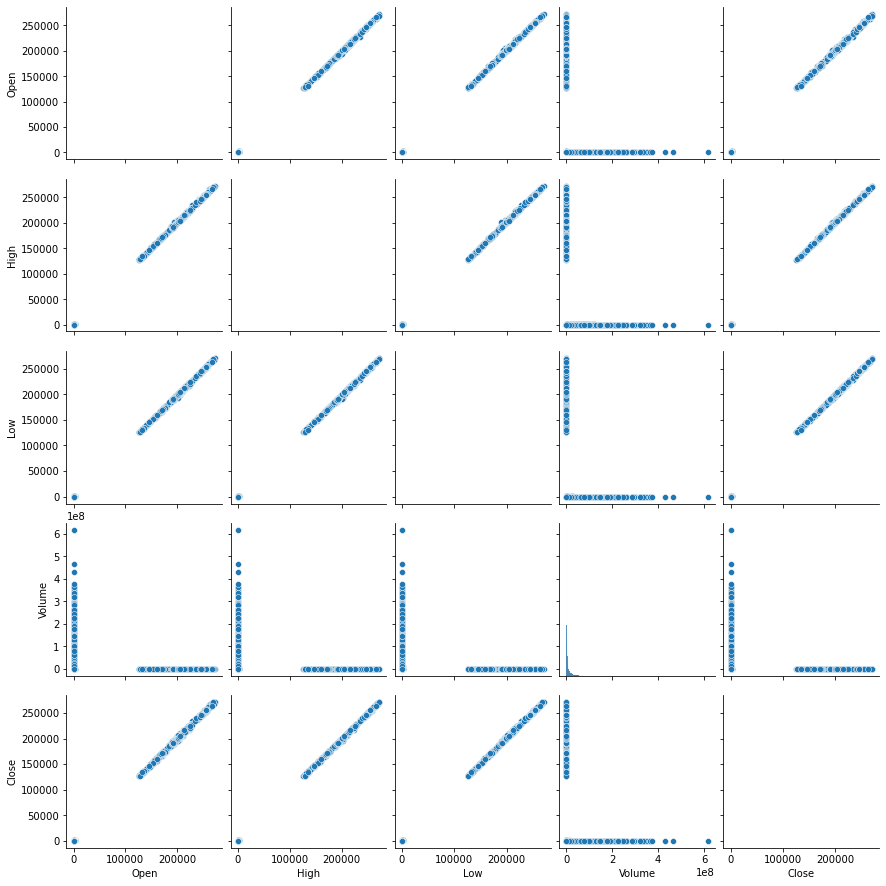

In [13]:
sns.pairplot(trn_d)

In [63]:

X=trn_d.iloc[:,:-1]
Y=trn_d.iloc[:,-1:]

In [64]:
X

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [72]:
Y

,Close
0,75.650002
1,124.449997
2,82.660004
3,57.009998
4,47.860001
...,...
97727,103.230003
97728,64.620003
97729,575.140015
97730,115.400002


## Removing NULL values

In [73]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [74]:
Y = Y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [75]:
np.where(np.isnan(Y))

(array([], dtype=int64), array([], dtype=int64))

In [76]:
X

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [77]:
## Using label encoding on Y to cnvert float to int

In [78]:
Y

,Close
0,75.650002
1,124.449997
2,82.660004
3,57.009998
4,47.860001
...,...
97727,103.230003
97728,64.620003
97729,575.140015
97730,115.400002


In [ ]:


## Feature Selection

### Mutual Information gain 

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_le = le.fit_transform(Y)

In [25]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,Y_le)
print(mi_score)

[4.21386227 4.76647788 4.7173994  0.32451146]


## Feature Selection using Mutal Info regression

Feature 0: 4.102847
Feature 1: 4.473270
Feature 2: 4.443530
Feature 3: 0.396575


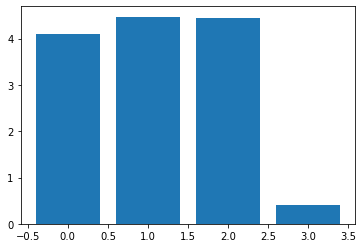

In [132]:

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_le, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Feature selection via grid search

In [158]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(0,5)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, Y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

C:\Users\kunal\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [            nan -10374.20554438  -7808.47633796  -5164.14795881
  -5164.14828945]
  warnings.warn(
C:\Users\kunal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best MAE: -5164.148
Best Config: {'sel__k': 3}
>nan with: {'sel__k': 0}
>-10374.206 with: {'sel__k': 1}
>-7808.476 with: {'sel__k': 2}
>-5164.148 with: {'sel__k': 3}
>-5164.148 with: {'sel__k': 4}


### Forward feature selection

In [183]:

!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X_1=X
Y_1=Y
lreg = LinearRegression()
sfs1 = SFS(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X_1,Y_1)
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-04-14 00:08:09] Features: 1/4 -- score: -10372.926439577426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2022-04-14 00:08:09] Features: 2/4 -- score: -7812.745682232943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


['Open', 'High', 'Low', 'Volume']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2022-04-14 00:08:09] Features: 3/4 -- score: -5176.943487383968[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-04-14 00:08:09] Features: 4/4 -- score: -5176.94347218419

 From the above feature selection techniques we found that the important features of 
   the data to train the model are ['Open', 'High', 'Low', 'Volume'].
 Hence we move forward to train the model

# Model Trainnig 

##   Splitting of Data

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [80]:
print("Size of training data",X_train.shape)
print("Size of training data class label",y_train.shape)
print("Size of testing data",X_test.shape)
print("Size of testing data class label",y_test.shape)

Size of training data (78185, 4)
Size of training data class label (78185, 1)
Size of testing data (19547, 4)
Size of testing data class label (19547, 1)


In our model we are using  models to predict the stock closing values

**1) Linear Regression**

**2) SVM Regression**

**3) Decision Tree Regression**

**4) Random Forest  Regression**

**5) KNN Regression**


In [83]:
X_train

,Open,High,Low,Volume
19192,40.580002,40.660000,39.279999,86679100.0
37678,42.400002,43.070000,42.360001,3757500.0
28824,25.219999,25.620001,25.010000,32705400.0
90218,17.190001,17.190001,16.730000,334100.0
69413,51.939999,52.540001,51.840000,26051300.0
...,...,...,...,...
85837,209.500000,210.979996,207.639999,1574600.0
16898,69.489998,69.779999,68.989998,5147300.0
57696,530.732849,534.013855,528.559814,2278500.0
87285,21.530001,22.139999,21.400000,74900.0


In [84]:
tst_d

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


## 1)Linear Regression(with hyperparameter tunning)

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import GridSearchCV

parameters_lr={} 
l_search = GridSearchCV(lr,param_grid=parameters_lr,scoring='neg_mean_squared_error',cv=10,verbose=0)
l_search.fit(X_train,y_train)
print("`````````````Linear Regression`````````````",'\n')
print(l_search.best_params_)

print(l_search.best_estimator_.score(X_test,y_test))

`````````````Linear Regression````````````` 

{}
0.9999892600004604


### Acuracy Score

In [82]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## prediction of model over test data
pred_4=l_search.predict(X_test)
predictions_4=pred_4.reshape(19547,1)

print('```````` Performamce of linear Regressor`````````',"\n")

## Scoring Parameters calculation
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_4,multioutput='uniform_average'))
print("Max Error :",max_error(y_test, pred_4))
print("MSE :",mean_squared_error(y_test,pred_4, squared=True))
print("RMSE :",mean_squared_error(y_test,pred_4, squared=False))
print("Median Absolute Error :",median_absolute_error(y_test,pred_4))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,pred_4))

```````` Performamce of linear Regressor````````` 

Mean Absolute Error :  6.340856327152869
Max Error : 2436.162059628812
MSE : 5338.595112604257
RMSE : 73.06569039298991
Median Absolute Error : 0.1584002066943313
Mean Absolute Percentage Error : 0.003618904904434548


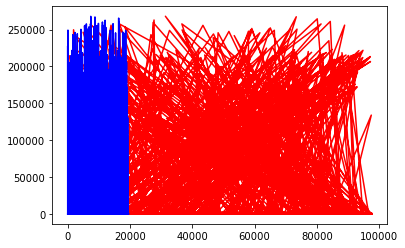

In [45]:
## Plot between actual value and predicted value
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(y_test,color='red')
plt.plot(pred_4,color='blue')

In [87]:
#saving the labels
pred_orig=l_search.predict(tst_d)
labels = open("Kunal_Shaw_Label_file.txt", "w+")
for i in range(len(pred_orig)):
    labels.write(str("d")+str(int(i+1))+","+str(float(pred_orig[i])) + "\n")

## 2)Support Vector Machine Regression

In [25]:
from sklearn import svm
clf = svm.SVR(C=0.8, epsilon=0.2, kernel='poly')
clf.fit(X_train, y_train)

SVR(C=0.8, epsilon=0.2, kernel='poly')

In [26]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


predict=clf.predict(X_test)
print('```````` Performamce of Support Vector machine   Regressor`````````',"\n")

## Scoring Parameters calculation
print("Mean Absolute Error : ",mean_absolute_error(y_test,predict,multioutput='uniform_average'))
print("Max Error :",max_error(y_test, predict))
print("RMSE :",mean_squared_error(y_test,predict, squared=False))
print("Median Absolute Error :",median_absolute_error(y_test,predict))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,predict))

```````` Performamce of Support Vector machine   Regressor````````` 

Mean Absolute Error :  2249.9689147600616
Max Error : 270353.7898486571
RMSE : 21325.78373357438
Median Absolute Error : 27.86579994919775
Mean Absolute Percentage Error : 15254720040652.16


## 3)Decision Tree Regression (with  GridSearch Hyperparameter Tunning)


In [26]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["quared_error","friedman_mse", "absolute_error", "poisson"],
            "splitter":["best","random"],
            "max_depth" : [1,5,20,50],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt"], #auto and None work the same
           "max_leaf_nodes":[None,10,20,30,40] }

from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor(random_state=0)
tuning_model=GridSearchCV(rgr,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=0)
tuning_model.fit(X_train,y_train)

print(tuning_model.best_params_)
print(tuning_model.best_estimator_)
print(tuning_model.best_estimator_.score(X_test,y_test))

{'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'splitter': 'best'}
DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      max_features='auto', min_samples_leaf=3, random_state=0)
0.9999735868876305


### Performace Metric

In [29]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## prediction of model over test data
pred_0=tuning_model.predict(X_test)
predictions=pred.reshape(19547,1)

## Scoring Parameters calculation
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,pred_0))
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_0,multioutput='uniform_average'))
print("Max Error :",max_error(y_test, pred_0))
print("RMSE :",mean_squared_error(y_test,pred_0, squared=False))
print("Median Absolute Error :",median_absolute_error(y_test,pred_0))

Mean Absolute Percentage Error : 155134995093.6831
Mean Absolute Error :  9.819528629527882
Max Error : 3753.5
RMSE : 114.2955689251889
Median Absolute Error : 0.18400120000000086


## 4)Random Forest Regression ( with GridSearch Hyper parameter tunning)

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor(random_state = 1)
parameters_rfr={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
               #'splitter':['best','random'],
               'max_depth' : [5,20],
            #'min_samples_split': [2,4,5,6],
            #'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
            'bootstrap': [True,False],
           'max_features':['auto','log2','sqrt'], #auto and None work the same
           #'max_leaf_nodes':[None,10,20,30,40],
               #'criterion':['mse','mae']
               }


g_search = GridSearchCV(RFR,param_grid=parameters_rfr,scoring='neg_mean_squared_error',cv=3,verbose=0)
g_search.fit(X_train,y_train)
print(g_search.best_params_)
print("`````````````Random Forest Regression`````````````")#print(tuning_model.best_estimator_)
print(g_search.best_estimator_.score(X_test,y_test))

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 13}
`````````````Random Forest Regression`````````````
0.9999783545701422


### Performance Metric

In [159]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## prediction of model over test data
pred_1=tuning_model.predict(X_test)
predictions=pred_1.reshape(19547,1)

print('```````` Performamce of Random Forest Regressor`````````',"\n")

## Scoring Parameters calculation
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_1,multioutput='uniform_average'))
print("Max Error :",max_error(y_test, pred_1))
print("RMSE :",mean_squared_error(y_test,pred_1, squared=False))
print("Median Absolute Error :",median_absolute_error(y_test,pred_1))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,pred_1))


```````` Performamce of Random Forest Regressor````````` 

Mean Absolute Error :  4.3697234370150575
Max Error : 5644.0
RMSE : 72.93806105499273
Median Absolute Error : 0.05666866666665271
Mean Absolute Percentage Error : 0.001956735711164968


## 5)KNN Regression ( with Grid Search Hyper Parmeter Tunning)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsRegressor()
parameters_knn={
    'n_neighbors':[2, 3, 5, 7, 10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']

               }


k_search = GridSearchCV(KNN,param_grid=parameters_knn,scoring='neg_mean_squared_error',cv=3,verbose=0)
k_search.fit(X_train,y_train)
print("`````````````KNN Regression`````````````",'\n')
print(k_search.best_params_)

print(k_search.best_estimator_.score(X_test,y_test))

`````````````KNN Regression````````````` 

{'algorithm': 'brute', 'n_neighbors': 2}
0.9999564486759063


### Performance Metric

In [27]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## prediction of model over test data
pred_3=k_search.predict(X_test)
predictions_3=pred_3.reshape(19547,1)

print('```````` Performamce of KNN Regressor`````````',"\n")

## Scoring Parameters calculation
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_3,multioutput='uniform_average'))
print("Max Error :",max_error(y_test, pred_3))
print("RMSE :",mean_squared_error(y_test,pred_3, squared=False))
print("Median Absolute Error :",median_absolute_error(y_test,pred_3))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,pred_3))



```````` Performamce of KNN Regressor````````` 

Mean Absolute Error :  46.43713828165448
Max Error : 4371.5
RMSE : 146.84902733298117
Median Absolute Error : 21.434999499999996
Mean Absolute Percentage Error : 0.5338784860167518


In [ ]:
Hence considering the scoring parameter we observe that Linear Regression perform best above